### Effects of outliers on ML models
1. Naive Bayes-----------------------------Not Sensitive
2. Support Vector Machine------------------Not Sensitive
3. Linear Regression-----------------------Sensitive
4. Logistic Regression---------------------Sensitive
5. Decision Tree Regression/Classifier-----Not Sensitive
6. Ensemble(RF,XGBoost)--------------------Not Sensitive
7. KNN-------------------------------------Not Sensitive
8. K Means Clustering----------------------Sensitive
9. Hierarchy Clustering--------------------Sensitive
10. PCA------------------------------------Sensitive
11. Neural Network-------------------------Sensitive

In [222]:
import pandas as pd
import seaborn as sns
import numpy as np

In [223]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\bipla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

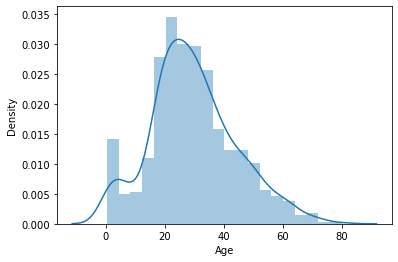

In [224]:
sns.distplot(df["Age"])

In [187]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\bipla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

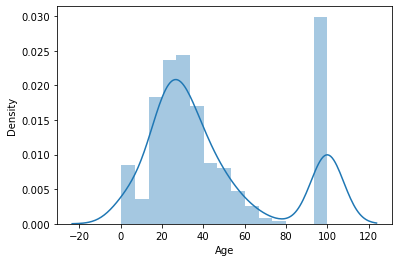

In [188]:
sns.distplot(df["Age"].fillna(100))

# Gaussian Distribution

Text(0, 0.5, 'No. of Passengers')

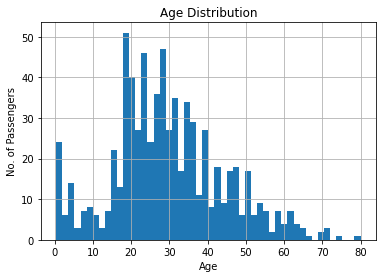

In [225]:
fig=df.Age.hist(bins=50)
fig.set_title("Age Distribution")
fig.set_xlabel("Age")
fig.set_ylabel("No. of Passengers")

<AxesSubplot:>

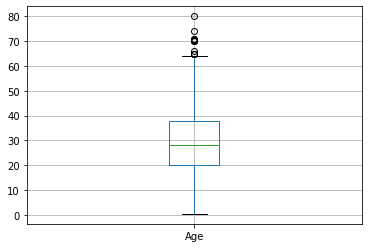

In [190]:
df.boxplot(column="Age")

In [191]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# Check outliers - When data is normally distributed

## df.Age follows the gaussian distribution we will calculate the outliers

In [226]:
## Checking the outliers
mean=df.Age.mean()
lb=mean-3*df.Age.std()
hb=mean+3*df.Age.std()
print(mean),print(lb),print(hb)

29.69911764705882
-13.88037434994331
73.27860964406095


(None, None, None)

# Check outliers - When data is skewed

## df.Fare follows the skewed distribution we will calculate the outliers

Text(0, 0.5, 'No. of Passengers')

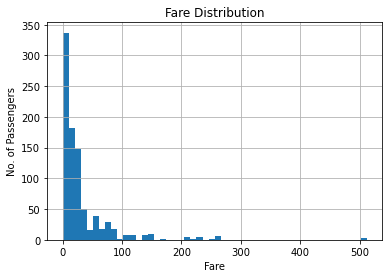

In [227]:
fig=df.Fare.hist(bins=50)
fig.set_title("Fare Distribution")
fig.set_xlabel("Fare")
fig.set_ylabel("No. of Passengers")

<AxesSubplot:>

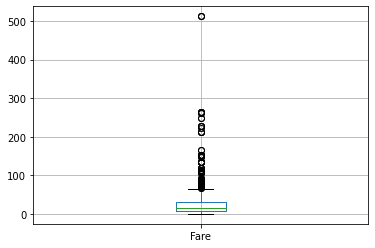

In [194]:
df.boxplot(column="Fare")

In [195]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [228]:
## Checking the outliers
iqr=df.Fare.quantile(.75)-df.Fare.quantile(.25)
lb=df.Fare.quantile(.25)-1.5*iqr
hb=df.Fare.quantile(.75)+1.5*iqr
print(iqr),print(lb),print(hb)

23.0896
-26.724
65.6344


(None, None, None)

In [229]:
## Checking the extreme outliers
lb=df.Fare.quantile(.25)-3*iqr
hb=df.Fare.quantile(.75)+3*iqr
print(iqr),print(lb),print(hb)

23.0896
-61.358399999999996
100.2688


(None, None, None)

## Handle outliers

In [230]:
data=df.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
## setting the outliers with hb
data.loc[data.Age>73]=73

Text(0, 0.5, 'No. of Passengers')

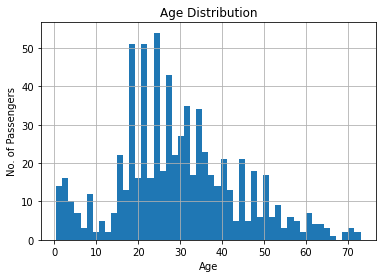

In [232]:
fig=data.Age.hist(bins=50)
fig.set_title("Age Distribution")
fig.set_xlabel("Age")
fig.set_ylabel("No. of Passengers")

In [233]:
## setting the outliers with hb
data.loc[data.Fare>100]=100

Text(0, 0.5, 'No. of Passengers')

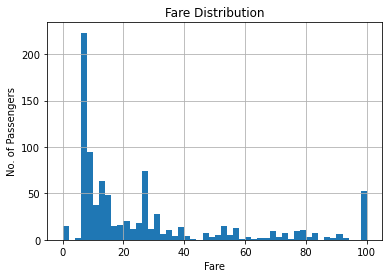

In [234]:
fig=data.Fare.hist(bins=50)
fig.set_title("Fare Distribution")
fig.set_xlabel("Fare")
fig.set_ylabel("No. of Passengers")

In [235]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[["Age","Fare"]].fillna(0),data["Survived"],train_size=.7)

In [204]:
y_test

450      0
617      0
768      0
780      1
544    100
      ... 
197      0
430      1
642      0
571      1
724      1
Name: Survived, Length: 268, dtype: int64

In [236]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
logit=LogisticRegression()
logit.fit(x_train,y_train)
y_pred=logit.predict(x_test)
y_pred1=logit.predict_proba(x_test)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC Score {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy Score 0.667910447761194


C:\Users\bipla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: multi_class must be in ('ovo', 'ovr')

In [237]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred1=rf.predict_proba(x_test)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC Score {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy Score 0.6828358208955224


ValueError: multi_class must be in ('ovo', 'ovr')